## LSTM Network Training

In [1]:
import os
import warnings
import pandas as pd

from src.stock_prediction_class import StockPrediction
from src.stock_prediction_numpy import StockData
from src.stock_prediction_deep_learning import train_LSTM_network

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or '3' to suppress all messages

# Suppress other warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

2024-05-29 22:03:39.563269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import secrets
# TOKEN = STOCK_TICKER + '_' + TODAY_RUN + '_' + secrets.token_hex(16)

In [3]:
STOCK_TICKER = "GOOG"
STOCK_START_DATE = pd.to_datetime("2020-05-01")
STOCK_VALIDATION_DATE = pd.to_datetime("2021-05-01")
EPOCHS = 100
BATCH_SIZE = 10
TIME_STEPS = 1
TODAY_RUN = datetime.today().strftime("%Y%m%d")
TOKEN = "GOOG"
FOLDER_PREFIX = "data/"
RUN_FOLDER = f"{FOLDER_PREFIX}{TOKEN}/"
WORK_DIR = os.path.join(os.getcwd(), RUN_FOLDER)
CSV_FILE = f"{WORK_DIR}downloaded_data.csv"

print('Ticker: ' + STOCK_TICKER)
print('Start Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Validation Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Test Run Folder: ' + RUN_FOLDER)

PROJECT_FOLDER = os.path.join(os.getcwd(), RUN_FOLDER)
if not os.path.exists(PROJECT_FOLDER):
    os.makedirs(PROJECT_FOLDER)

Ticker: GOOG
Start Date: 2020-05-01
Validation Date: 2020-05-01
Test Run Folder: data/GOOG/


mean: [0.36157151]
max 1.0
min 0.0
Std dev: [0.25302131]
plotting Data and Histogram


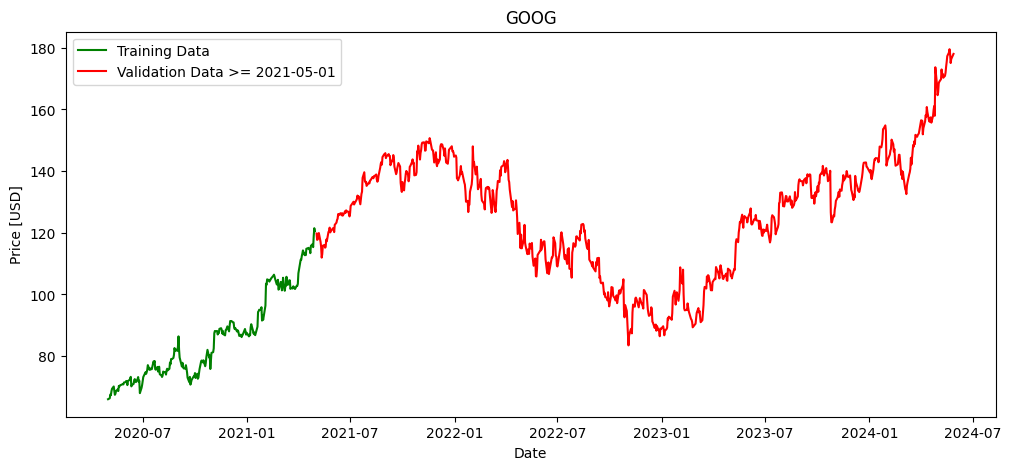

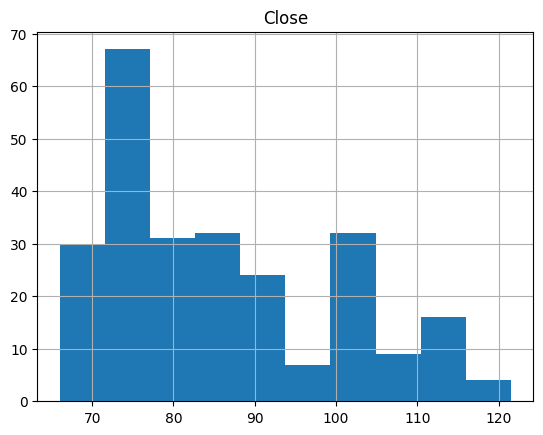

2024-05-29 22:03:42.422013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 22:03:42.428134: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 22:03:42.428194: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 22:03:42.430353: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 22:03:42.430421: I external/local_xla/xla/stream_executor

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2024-05-29 22:03:46.167692: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - MSE: 0.1847 - loss: 0.1843 - val_MSE: 0.1457 - val_loss: 0.1508
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - MSE: 0.1104 - loss: 0.1105 - val_MSE: 0.0271 - val_loss: 0.0286
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - MSE: 0.0549 - loss: 0.0547 - val_MSE: 0.0263 - val_loss: 0.0277
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - MSE: 0.0301 - loss: 0.0301 - val_MSE: 0.0087 - val_loss: 0.0090
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - MSE: 0.0190 - loss: 0.0190 - val_MSE: 0.0094 - val_loss: 0.0096
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - MSE: 0.0163 - loss: 0.0163 - val_MSE: 0.0032 - val_loss: 0.0032
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - MSE: 0.0118 - loss: 0.0118 - val_MSE: 0.0017 - val_loss: 0.0018
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - MSE: 0.0097 - loss: 0.0097 - val_MSE: 0.0031 - val_loss: 0.0031
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - MSE: 0.0125 - 

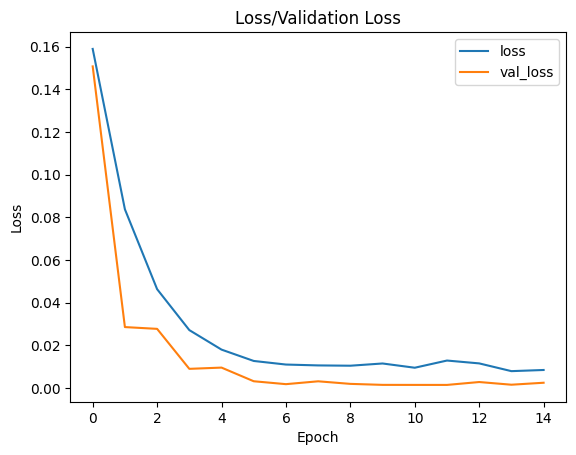

plotting MSE


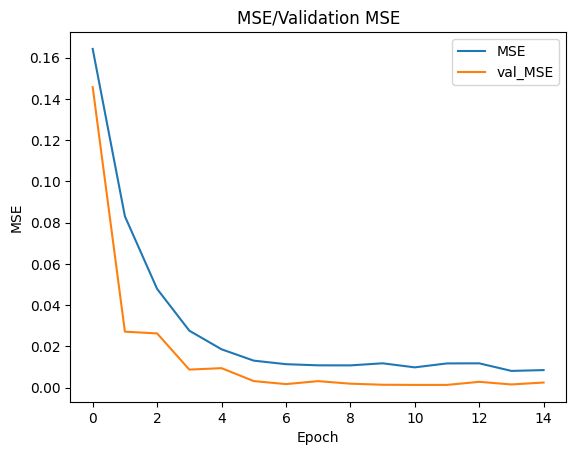

display the content of the model
25/25 - 0s - 7ms/step - MSE: 0.0025 - loss: 0.0024
loss :  0.0024047833867371082
compile_metrics :  0.002471803454682231

plotting prediction results
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
plotting predictions


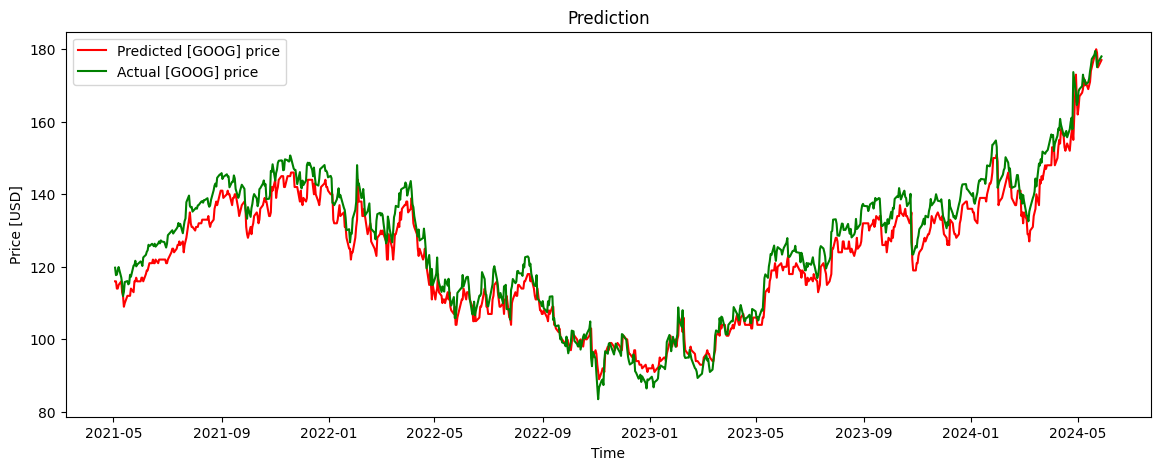

prediction is finished


In [4]:
stock_prediction = StockPrediction(STOCK_TICKER, 
                                   STOCK_START_DATE, 
                                   STOCK_VALIDATION_DATE, 
                                   PROJECT_FOLDER, 
                                   EPOCHS,
                                   TIME_STEPS,
                                   TOKEN,
                                   BATCH_SIZE)
# Execute Deep Learning model
train_LSTM_network(stock_prediction)

## Prediction

In [5]:
def infer_data(stock_data, min_max, start_date, end_date, latest_close_price, work_dir):
    
    x_test, y_test, test_data = stock_data.generate_future_data(TIME_STEPS, min_max, start_date, end_date, latest_close_price)

    # Check if the future data is not empty
    if x_test.shape[0] > 0:
        # load the weights from our best model
        model = tf.keras.models.load_model(os.path.join(work_dir, 'model_weights.keras'))
        model.summary()

        # perform a prediction
        test_predictions_baseline = model.predict(x_test)
        test_predictions_baseline = min_max.inverse_transform(test_predictions_baseline)
        test_predictions_baseline = pd.DataFrame(test_predictions_baseline, columns=['Predicted_Price'])

        # Combine the predicted values with dates from the test data
        predicted_dates = pd.date_range(start=test_data.index[0], periods=len(test_predictions_baseline))
        test_predictions_baseline['Date'] = predicted_dates
        
        # Reset the index for proper concatenation
        test_data.reset_index(inplace=True)
        
        # Concatenate the test_data and predicted data
        combined_data = pd.concat([test_data, test_predictions_baseline], ignore_index=True)
        
        # Plotting predictions
        plt.figure(figsize=(14, 5))
        plt.plot(combined_data['Date'], combined_data.Close, color='green', label='Simulated [' + STOCK_TICKER + '] price')
        plt.plot(combined_data['Date'], combined_data['Predicted_Price'], color='red', label='Predicted [' + STOCK_TICKER + '] price')
        plt.xlabel('Time')
        plt.ylabel('Price [USD]')
        plt.legend()
        plt.title('Simulated vs Predicted Prices')
        plt.savefig(os.path.join(work_dir, 'future_comparison.png'))
        plt.show()
    else:
        print("Error: Future data is empty.")

mean: [0.36157151]
max 1.0
min 0.0
Std dev: [0.25302131]
178.02000427246094: latest_close_price
2024-05-28 00:00:00: latest_date
2024-05-29 00:00:00: start_date
2024-06-07 00:00:00: end_date


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,355 (1.28 MB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,904 (870.72 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


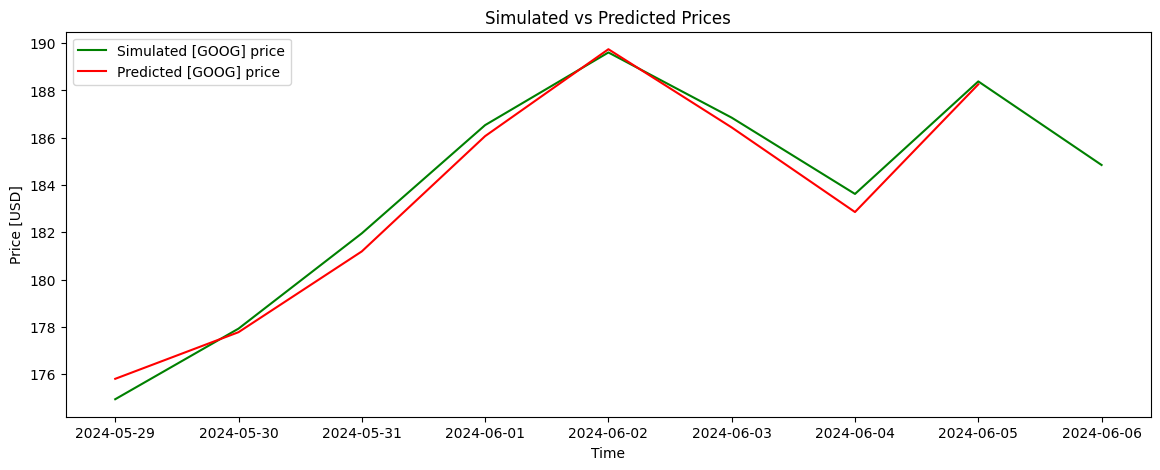

In [6]:
stock_data = StockData(stock_prediction)
min_max = stock_data.get_min_max()

(x_train, y_train), (x_test, y_test), (training_data, test_data) = stock_data.load_csv_transform_to_numpy(TIME_STEPS, CSV_FILE)

latest_close_price = test_data.Close.iloc[-1]
latest_date = test_data[-1:]['Close'].idxmin()

print(f"{latest_close_price}: latest_close_price")
print(f"{latest_date}: latest_date")

start_date = latest_date + timedelta(1)
# Specify the next 10 days
end_date = latest_date + timedelta(TIME_STEPS * 10)

print(f"{start_date}: start_date")
print(f"{end_date}: end_date")

infer_data(stock_data, min_max, start_date, end_date, latest_close_price, WORK_DIR)